In [2]:
from IPython.display import HTML

HTML('''
    <script>
        code_show=true; 
        function code_toggle() {
            if (code_show){
                $('div.input').hide();
                $('button#code-toggle').text('Show Code');
            } else {
                $('div.input').show();
                $('button#code-toggle').text('Hide Code');
            }
            code_show = !code_show
        }
    </script>

    <button id="code-toggle" onclick="javascript:code_toggle()">
        Hide Code
    </button>
''')

# Challenge: Preparing a dataset for modeling

Dataset from [Kaggle](https://www.kaggle.com/c/titanic)

This dataset contains information for passengers on the Titanic's tragic maiden journey on April 15, 1912. The sinking killed 1502 out of 2224 passengers and crew. The dataset contains 891 entries (i.e. passengers) with 12 different columns: `PassengerId`, `Survived`, `Pclass` (class of ticket), `Name`, `Sex`, `Age`, `SibSp` (# of sublings and spouses on board), `Parch` (# of parents and children on board), `Ticket` (ticket number), `Fare`, `Cabin`, and `Embarked` (port of embarkation).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./titanic/train.csv')
print(df.columns, df.shape)
df.head(10)

# df[df['Name'].str.contains('Futrelle')]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


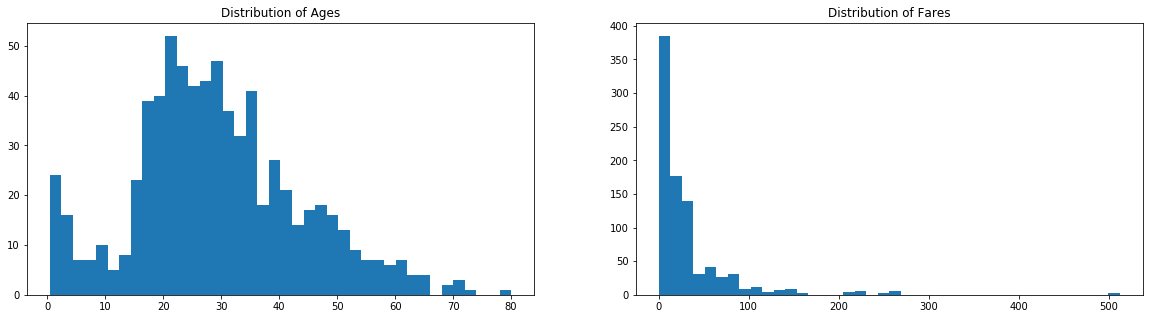

In [4]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
non_null_ages = df[pd.notnull(df['Age'])]['Age']
plt.hist(non_null_ages, bins=40)
plt.title('Distribution of Ages')

plt.subplot(1, 2, 2)
non_null_fares = df[pd.notnull(df['Fare'])]['Fare']
plt.hist(non_null_fares, bins=40)
plt.title('Distribution of Fares')

plt.show()

In [5]:
non_null_parch = df[pd.notnull(df['Parch'])]['Parch']
non_null_sibsp = df[pd.notnull(df['SibSp'])]['SibSp']
non_null_pclass = df[pd.notnull(df['Pclass'])]['Pclass']
non_null_sex = df[pd.notnull(df['Sex'])]['Sex']

print('Age:\n {} null values\n variance: {}'.format(df.shape[0] - non_null_ages.shape[0], non_null_ages.var()))
print('Fare:\n {} null values\n variance: {}'.format(df.shape[0] - non_null_fares.shape[0], non_null_fares.var()))
print('SibSp:\n {} null values\n variance: {}'.format(df.shape[0] - non_null_sibsp.shape[0], non_null_sibsp.var()))
print('Parch:\n {} null values\n variance: {}'.format(df.shape[0] - non_null_parch.shape[0], non_null_parch.var()))
print('Pclass:\n {} null values'.format(df.shape[0] - non_null_pclass.shape[0]))
print('Sex:\n {} null values'.format(df.shape[0] - non_null_sex.shape[0]))

Age:
 177 null values
 variance: 211.0191247463081
Fare:
 0 null values
 variance: 2469.436845743117
SibSp:
 0 null values
 variance: 1.2160430774662894
Parch:
 0 null values
 variance: 0.6497282437357467
Pclass:
 0 null values
Sex:
 0 null values


In [6]:
single_women = df[df['Name'].str.contains('Miss. ')]
single_women_num = single_women.shape[0]

single_women_survivors = single_women[single_women['Survived'] == 1]
single_women_survivors_num = single_women_survivors.shape[0]

single_women_survival_rate = round(single_women_survivors_num/single_women_num * 100, 2)

print('{} single women – {}% survived'.format(single_women_num, single_women_survival_rate))


married_women = df[df['Name'].str.contains('Mrs. ')]
married_women = married_women[married_women['SibSp'] != 0]
married_women_num = married_women.shape[0]

married_women_survivors = married_women[married_women['Survived'] == 1]
married_women_survivors_num = married_women_survivors.shape[0]

married_women_survival_rate = round(married_women_survivors_num/married_women_num * 100, 2)

print('{} women probably with spouse (more research needed to confirm) – {}% survived'.format(married_women_num, married_women_survival_rate))

182 single women – 69.78% survived
80 women probably with spouse (more research needed to confirm) – 77.5% survived


## Exploring the data: Bivariate
Next, examine the pairwise relationships among your data.

### Continuous Variables
The scatterplot represents the relationship between two continuous variables. For this sort of wide-scale dataset investigation, we can go a step further and create a scatterplot matrix that shows all the bivariate relationships in one plot made up of subplots.

The correlation coefficient r is a numeric representation of the linear relationship between two continuous variables. Correlations range from -1 (as values in one variable go up, values in the other go down) to 0 (no relationship between the variables) to 1 (as values in one variable go up, values in the other go up as well).
Look for: two-dimensional outliers that represent unusual combinations of values

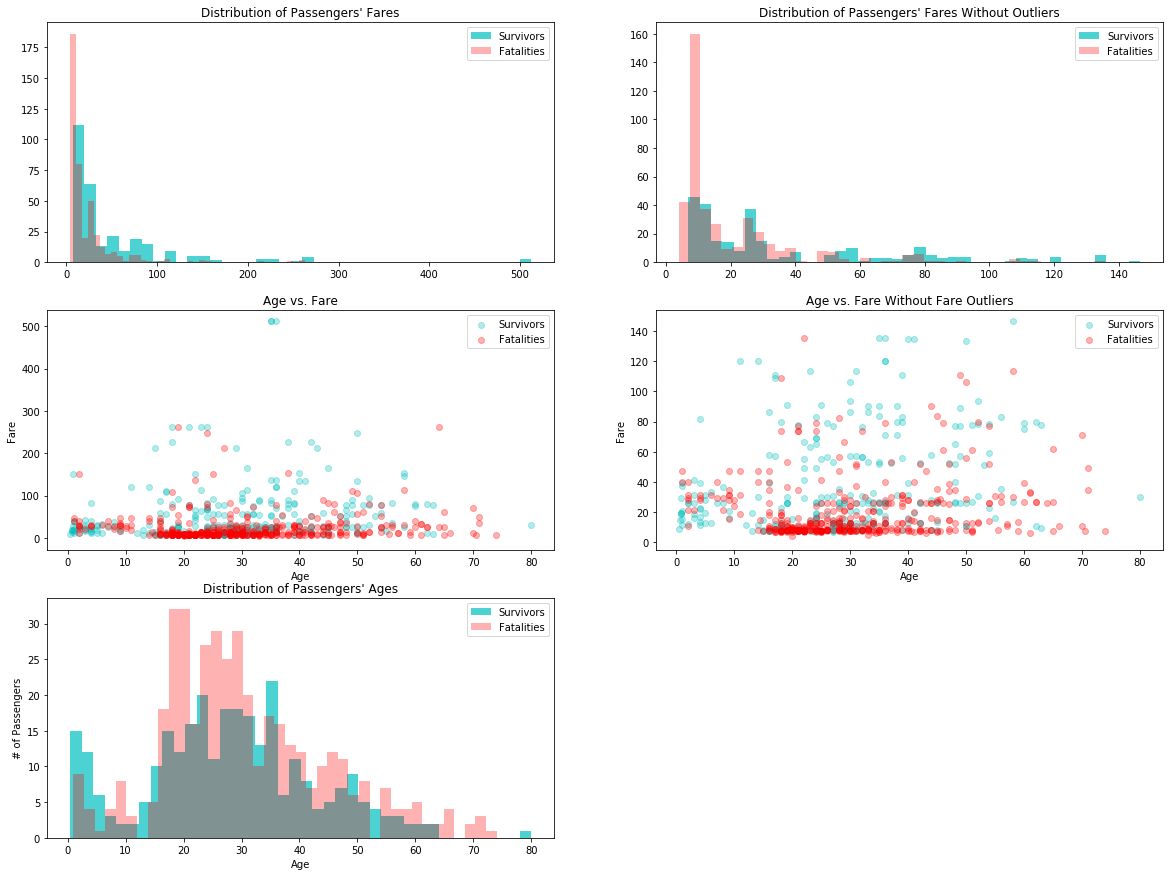

In [7]:
survivors = df[df['Survived'] == 1]
survivors = survivors[pd.notnull(survivors['Age'])]
survivors = survivors[survivors['Fare'] > 0]

fatalities = df[df['Survived'] == 0]
fatalities = fatalities[pd.notnull(fatalities['Age'])]
fatalities = fatalities[fatalities['Fare'] > 0]

survivors_without_outliers = survivors[survivors['Fare'] <= 150]
fatalities_without_outliers = fatalities[fatalities['Fare'] <= 150]

plt.figure(figsize=(20,15))

plt.subplot(3, 2, 1)
plt.hist(survivors['Fare'], bins=40, color='c', alpha=0.7)
plt.hist(fatalities['Fare'], bins=40, color='red', alpha=0.3)
plt.title('Distribution of Passengers\' Fares')
plt.legend(['Survivors', 'Fatalities'])

plt.subplot(3, 2, 2)
plt.hist(survivors_without_outliers['Fare'], bins=40, color='c', alpha=0.7)
plt.hist(fatalities_without_outliers['Fare'], bins=40, color='red', alpha=0.3)
plt.title('Distribution of Passengers\' Fares Without Outliers')
plt.legend(['Survivors', 'Fatalities'])

plt.subplot(3, 2, 3)
plt.scatter(survivors['Age'], survivors['Fare'], color='c', alpha=0.3)
plt.scatter(fatalities['Age'], fatalities['Fare'], color='red', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.legend(['Survivors', 'Fatalities'])

plt.subplot(3, 2, 4)
plt.scatter(survivors_without_outliers['Age'], survivors_without_outliers['Fare'], color='c', alpha=0.3)
plt.scatter(fatalities_without_outliers['Age'], fatalities_without_outliers['Fare'], color='red', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare Without Fare Outliers')
plt.legend(['Survivors', 'Fatalities'])

plt.subplot(3, 2, 5)
plt.hist(survivors['Age'], bins=40, color='c', alpha=0.7)
plt.hist(fatalities['Age'], bins=40, color='red', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.title('Distribution of Passengers\' Ages')
plt.legend(['Survivors', 'Fatalities'])

plt.show()

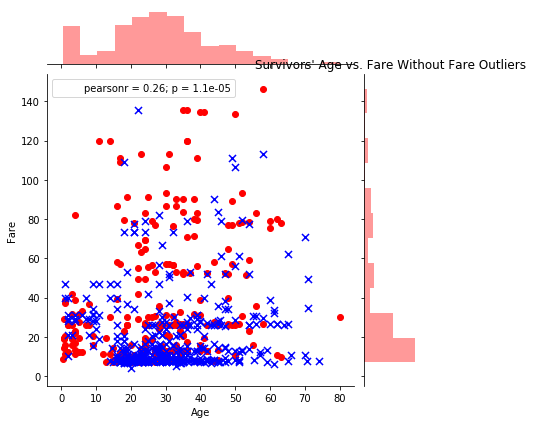

In [8]:
graph = sns.jointplot(x="Age", y="Fare", data=survivors_without_outliers, color='r')
plt.title('Survivors\' and Fatalities\' Age vs. Fare Without Fare Outliers')

graph.x = fatalities_without_outliers.Age
graph.y = fatalities_without_outliers.Fare
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)

plt.show()

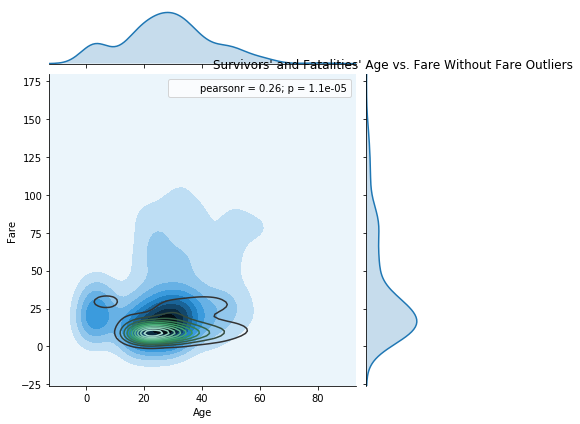

In [16]:
graph = sns.jointplot(x="Age", y="Fare", data=survivors_without_outliers, kind="kde")
plt.title('Survivors\' and Fatalities\' Age vs. Fare Without Fare Outliers')

graph.x = fatalities_without_outliers.Age
graph.y = fatalities_without_outliers.Fare
graph.plot_joint(sns.kdeplot)

plt.show()

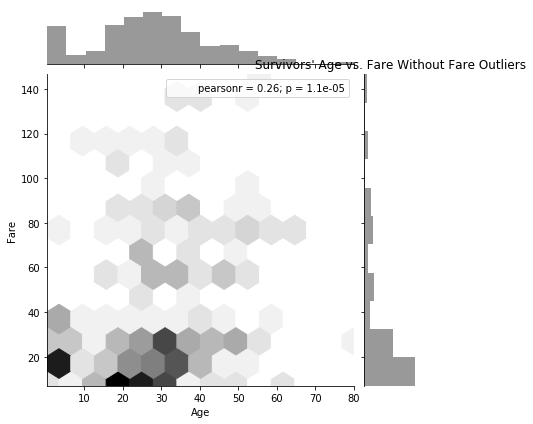

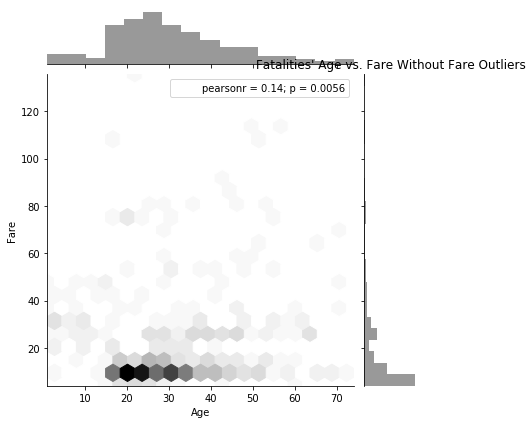

In [9]:
sns.jointplot(x="Age", y="Fare", data=survivors_without_outliers, kind="hex", color="k")
plt.title('Survivors\' Age vs. Fare Without Fare Outliers')

sns.jointplot(x="Age", y="Fare", data=fatalities_without_outliers, kind="hex", color="k")
plt.title('Fatalities\' Age vs. Fare Without Fare Outliers')

plt.show()

### Continuous vs. Categorical Variables
Box, violin, or similar plots estimate the value of the continuous variable for each value of the categorical variable.
Descriptive statistics, including estimates of central tendency and variance, for the continuous variable at each level of the categorical variable.
T-tests and ANOVA
Look for: Outliers in each group, very small groups

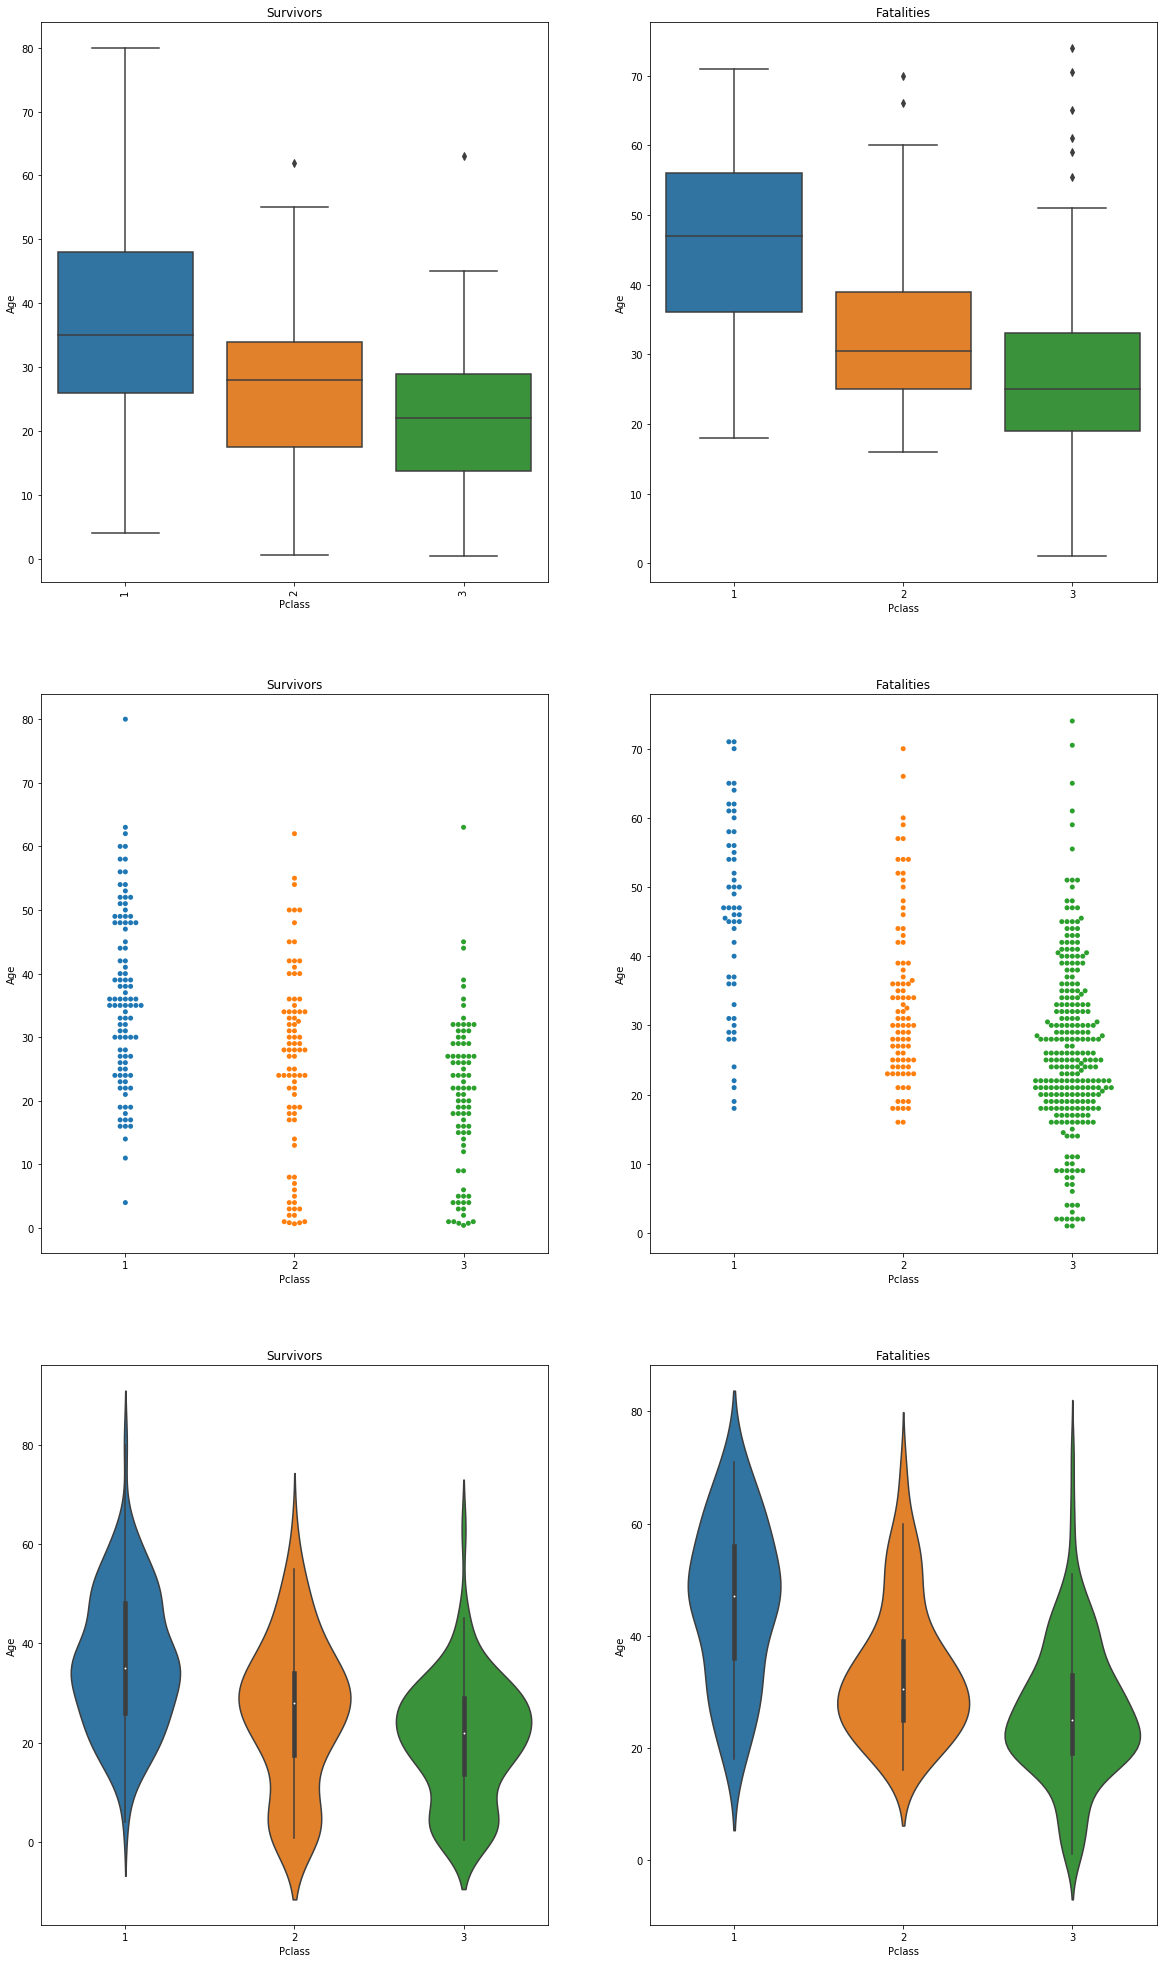

In [10]:
data_non_null = df[pd.notnull(df['Age'])]
data_non_null = data_non_null[data_non_null['Fare'] <= 150]
# data_without_outliers = data_without_outliers[data_without_outliers['Fare'] <= 150]

figure = plt.figure(figsize=(20,35))

figure.add_subplot(3, 2, 1)
plt.title('Survivors')
plt.xticks(rotation=90)
sns.boxplot(x="Pclass", y="Age", data=survivors_without_outliers, dodge=False)

figure.add_subplot(3, 2, 2)
plt.title('Fatalities')
sns.boxplot(x="Pclass", y="Age", data=fatalities_without_outliers, dodge=False)

figure.add_subplot(3, 2, 3)
plt.title('Survivors')
sns.swarmplot(x="Pclass", y="Age", data=survivors_without_outliers)

figure.add_subplot(3, 2, 4)
plt.title('Fatalities')
sns.swarmplot(x="Pclass", y="Age", data=fatalities_without_outliers)

figure.add_subplot(3, 2, 5)
plt.title('Survivors')
sns.violinplot(x="Pclass", y="Age", data=survivors_without_outliers)

figure.add_subplot(3, 2, 6)
plt.title('Fatalities')
sns.violinplot(x="Pclass", y="Age", data=fatalities_without_outliers)

plt.show()

### Categorical Variables
A barplot, with the height of each bar indicating the number of datapoints in each combination of levels of the two variables
A table of counts, giving the number of datapoints for each combination of levels of the two variables
Chi-square tests that indicate whether one combination of levels is significantly smaller or larger than the rest.
Look for: Subgroups with very small counts relative to the other subgroups

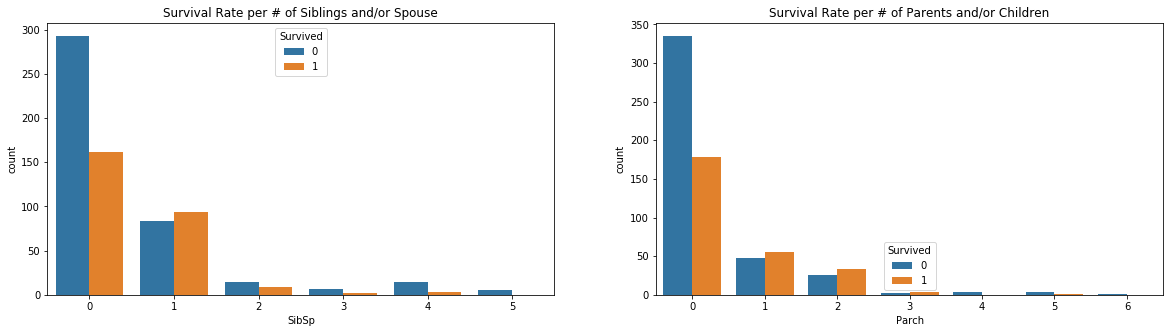

Survived    0    1
Pclass            
1          57  102
2          90   83
3         270   85


In [11]:
figure = plt.figure(figsize=(20,5))

figure.add_subplot(1, 2, 1)
plt.title('Survival Rate per # of Siblings and/or Spouse')
sns.countplot(x="SibSp", hue="Survived", data=data_non_null)

figure.add_subplot(1, 2, 2)
plt.title('Survival Rate per # of Parents and/or Children')
sns.countplot(x="Parch", hue="Survived", data=data_non_null)

plt.show()

counttable = pd.crosstab(data_non_null['Pclass'], data_non_null['Survived'])
print(counttable)

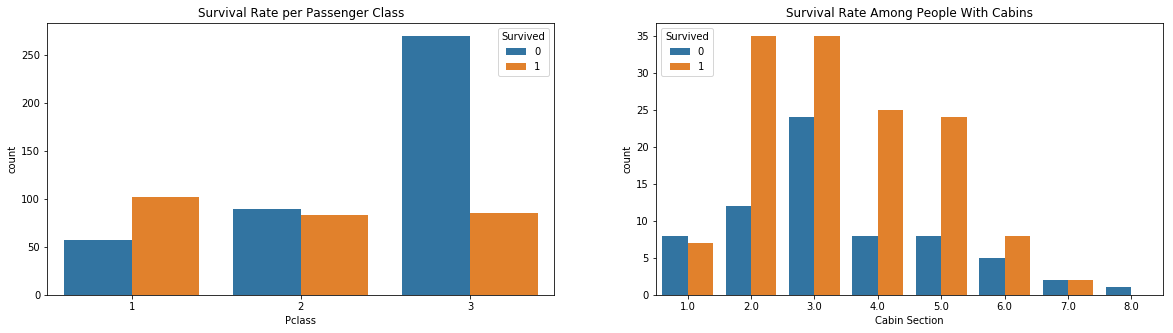

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Section
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [12]:
import math

def get_cabin_section(cabin_str):
    if isinstance(cabin_str, float) and math.isnan(cabin_str):
        return cabin_str
    else:
        multiple_cabins = cabin_str.split()
        all_sections = list(map(lambda x: x[0], multiple_cabins))
        more_than_one_section = len(set(all_sections)) > 1
        return {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}[all_sections[0]]
    #     Later, parse out the rows with more than one cabin
    #     return all_sections if more_than_one_section else all_sections[0]

df.loc[:, 'Cabin Section'] = df['Cabin'].apply(get_cabin_section)

figure = plt.figure(figsize=(20,5))

figure.add_subplot(1, 2, 1)
plt.title('Survival Rate per Passenger Class')
sns.countplot(x="Pclass", hue="Survived", data=data_non_null)

figure.add_subplot(1, 2, 2)
plt.title('Survival Rate Among People With Cabins')
sns.countplot(x="Cabin Section", hue="Survived", data=df)
plt.show()

df.head()

## Creating New Features

### 1. Age Group – 'Child' (0-18), 'Young Adult' (19-35), 'Middle-Aged Adult' (36-55), 'Older Adult' (56+)

I want to test the hypothesis that belonging to a general age range raised a passenger's chances of surviving.

In [13]:
def get_age_group(age):
    if isinstance(age, float) and math.isnan(age):
        return age
    elif age <= 18:
        return 0 # Child
    elif age <= 35:
        return 1 # Young Adult
    elif age <= 55:
        return 2 # Middle-Aged Adult
    else:
        return 3 # Older Adult

df.loc[:, 'Age Group'] = df['Age'].apply(get_age_group)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Section,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,1.0


### 2. Spouse Onboard – True or False if spouse is onboard the Titanic

I want to test the hypothesis that passengers who had their spouses traveling with them had a higher chance of survival (esp. the women). 

In [14]:
import re

def get_husband_name(wife_name):
    regex = re.compile(".*?\((.*?)\)")
    result = re.findall(regex, wife_name)
    result.append('(')
    result.append(')')
    husband_name = wife_name
    for replacement in result:
        husband_name = husband_name.replace(replacement, '')
    husband_name = husband_name.replace('Mrs. ', 'Mr. ').strip()
    return husband_name 

def get_wife_name(husband_name):
    wife_name = husband_name
    wife_name = wife_name.replace('Mr. ', 'Mrs. ')
    return wife_name

def has_spouse(row):
    if 'Mrs. ' in row['Name'] and row['SibSp'] > 0:
        husband_name = get_husband_name(row['Name'])
        husband_search_results = df[df['Name'] == husband_name.strip()]
        if husband_search_results.shape[0] > 0:
            return True
        else:
            return False
    elif 'Mr. ' in row['Name'] and row['SibSp'] > 0:
        wife_name = get_wife_name(row['Name'])
        wife_search_results = df[df['Name'].str.startswith(wife_name.strip())]
        if wife_search_results.shape[0] > 0:
            return True
        else:
            return False
    else:
        return False

df.loc[:, 'Spouse Onboard'] = df.apply(has_spouse, axis=1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Section,Age Group,Spouse Onboard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1.0,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,2.0,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1.0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,1.0,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,1.0,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,NaN,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,5.0,2.0,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,0.0,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,1.0,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,0.0,True


### 3. Siblings – Total # of siblings onboard the Titanic



In [15]:
def num_siblings(row):
    if row['SibSp'] > 0:
        if row['Spouse Onboard'] == True:
            return int(row['SibSp']) - 1
        else:
            return int(row['SibSp'])
    else:
        return 0
    
df.loc[:, 'Siblings'] = df.apply(num_siblings, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Section,Age Group,Spouse Onboard,Siblings
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1.0,False,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,2.0,False,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1.0,False,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,1.0,True,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,1.0,False,0


### 4. Parents – Total # of parents onboard the Titanic
### 5. Children – Total # of children onboard the Titanic

In [16]:
def get_last_name(full_name):
    return full_name.split(', ')[0]

def num_children(row):
    if row['Parch'] > 0:
        family_members = df[df['Name'].str.startswith(get_last_name(row['Name']))]
        younger_family_members = family_members[family_members['Age'] < (row['Age'] - 10)]
        if younger_family_members.shape[0] == row['Parch'] or younger_family_members.shape[0] < row['Parch']:
            return younger_family_members.shape[0]
        else:
            return 0
    else:
        return 0
    
def num_parents(row):
    if row['Parch'] > 0:
        return row['Parch'] - row['Children']
    else:
        return 0
    
df.loc[:, 'Children'] = df.apply(num_children, axis=1)
df.loc[:, 'Parents'] = df.apply(num_parents, axis=1)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Section,Age Group,Spouse Onboard,Siblings,Children,Parents
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1.0,False,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,2.0,False,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1.0,False,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,1.0,True,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,1.0,False,0,0,0


### 6. Cabin Section – Letter for Cabin (e.g. C for cabin C123)

`Cabin Section` was already added as a column for earlier visualization.

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Section,Age Group,Spouse Onboard,Siblings,Children,Parents
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1.0,False,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,2.0,False,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1.0,False,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,1.0,True,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,1.0,False,0,0,0


### 7. Wife With Husband Onboard – True or False if woman with husband onboard the Titanic

In [18]:
def has_husband_onboard(row):
    if 'Mrs. ' in row['Name'] and row['Spouse Onboard'] == True:
        return True
    else:
        return False

df.loc[:, 'Wife With Husband Onboard'] = df.apply(has_husband_onboard, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Section,Age Group,Spouse Onboard,Siblings,Children,Parents,Wife With Husband Onboard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1.0,False,1,0,0,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,2.0,False,1,0,0,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1.0,False,0,0,0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,1.0,True,0,0,0,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,1.0,False,0,0,0,False


### 8. Child With Parent Onboard – True or False if child with 1+ parent onboard

In [19]:
def child_with_parent_onboard(row):
    if row['Age Group'] == 0 and row['Parents'] > 0:
        return True
    else:
        return False

df.loc[:, 'Child With Parent Onboard'] = df.apply(child_with_parent_onboard, axis=1)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Section,Age Group,Spouse Onboard,Siblings,Children,Parents,Wife With Husband Onboard,Child With Parent Onboard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1.0,False,1,0,0,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,2.0,False,1,0,0,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1.0,False,0,0,0,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,1.0,True,0,0,0,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,1.0,False,0,0,0,False,False


### 9. Traveling With One – True or False if traveling with only one other person

In [23]:
def traveling_with_one(row):
    return (row['SibSp'] + row['Parch']) == 1

df.loc[:, 'Traveling With One'] = df.apply(traveling_with_one, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin Section,Age Group,Spouse Onboard,Siblings,Children,Parents,Wife With Husband Onboard,Child With Parent Onboard,Traveling With One,Only Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,NaN,1.0,False,1,0,0,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,3.0,2.0,False,1,0,0,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,NaN,1.0,False,0,0,0,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,3.0,1.0,True,0,0,0,True,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,NaN,1.0,False,0,0,0,False,False,False,False


### 10. Only Child – True or False if child does not have any siblings

In [30]:
def only_child(row):
    return (row['Age Group'] == 0 and row['Siblings'] == 0)

df.loc[:, 'Only Child'] = df.apply(only_child, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin Section,Age Group,Spouse Onboard,Siblings,Children,Parents,Wife With Husband Onboard,Child With Parent Onboard,Traveling With One,Only Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,NaN,1.0,False,1,0,0,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,3.0,2.0,False,1,0,0,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,NaN,1.0,False,0,0,0,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,3.0,1.0,True,0,0,0,True,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,NaN,1.0,False,0,0,0,False,False,False,False


## Choose Features

Finally, use filtering methods to select the five best features and justify your choices.

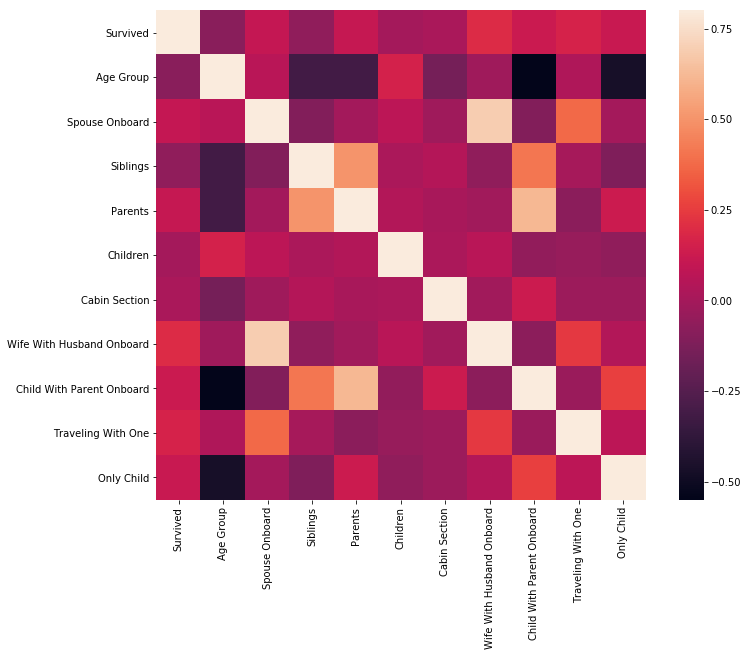

Survived                     1.000000
Age Group                   -0.081771
Spouse Onboard               0.099238
Siblings                    -0.061448
Parents                      0.104488
Children                     0.000728
Cabin Section                0.018825
Wife With Husband Onboard    0.196671
Child With Parent Onboard    0.121901
Traveling With One           0.163157
Only Child                   0.116243
Name: Survived, dtype: float64


In [36]:
features = ['Survived', 'Age Group', 'Spouse Onboard', 'Siblings', 'Parents', 'Children', 'Cabin Section', 'Wife With Husband Onboard', 'Child With Parent Onboard', 'Traveling With One', 'Only Child']
correlation_mat = df[features].corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(correlation_mat, vmax=.8, square=True)
plt.show()
print(correlation_mat['Survived'])

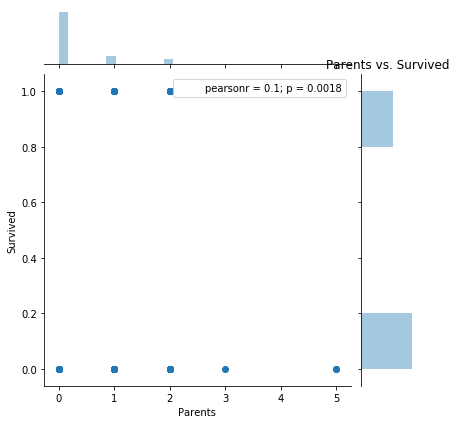

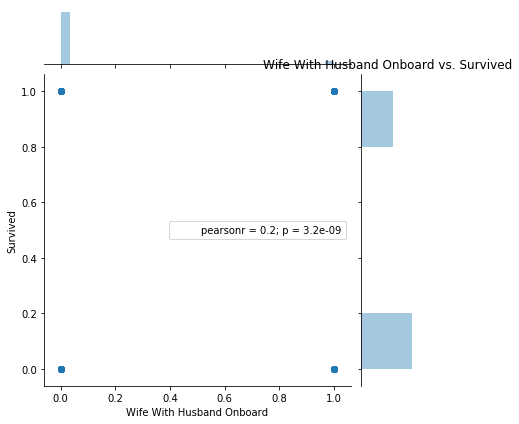

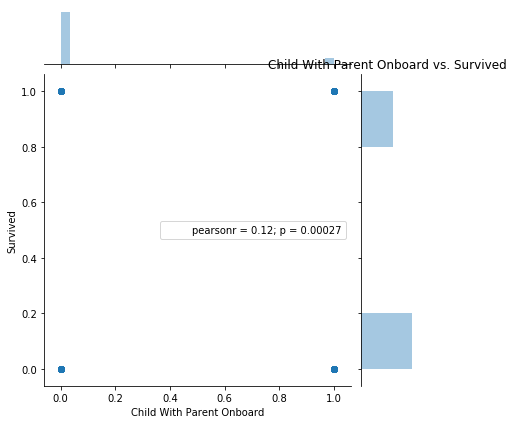

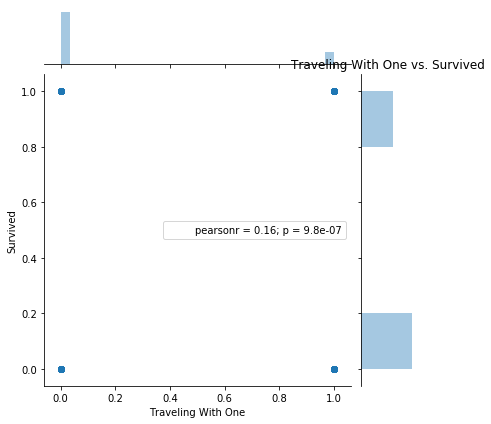

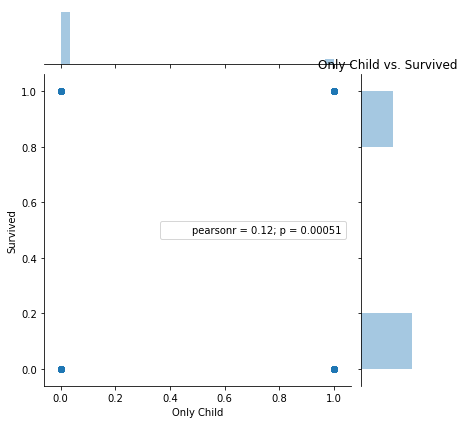

In [38]:
selected_features = ['Parents', 'Wife With Husband Onboard', 'Child With Parent Onboard', 'Traveling With One', 'Only Child']

for feature in selected_features:
    sns.jointplot(x=feature, y="Survived", data=df)
    plt.title('{} vs. Survived'.format(feature))
    plt.show()